# Keras ile Derin Öğrenmeye Giriş

Derin öğrenme son zamanlarda yapay öğrenme alanındaki en popüler konulardan biri. AlphaGo adlı bir bilgisayar programının kısa vadede çözülemeyeceği iddia edilen Go oyununda dünya şampiyonu olan Lee Sedol'u yenmesi ve bunun popüler bir şekilde belgeselleştirilmesi de derin öğrenmenin ününü pekiştirdi. Ancak, derin öğrenme konusundaki ilk önemli gelişme ImageNet yarışmasında derin öğrenme yöntemlerinin sağladığı iyileşmelerdi. Fotoğraflardaki objelerin sınıflandırılması üzerine olan bu yarışmada 2011 yılında %75 civarında olan başarı düzeyi, 2012 yılında ilk derin öğrenme modeliyle birlikte %10 civarında iyileşti. 2015 yılında ise artık derin öğrenme modelleri insanlardan daha iyi bir performans gösterir oldular. 

Derin öğrenme konusunda Keras oldukça önemli paketlerden biri. Aslında Keras kendi başına bir derin öğrenme kütüphanesi değil. Keras, size Google Tensorflow, Microsoft CNTK, ve Theano derin öğrenme kütüphanelerini kullanabileceğiniz üst seviye bir API (application programming interface, uygulama programlama arayüzü) sunuyor. Bu sayede oluşturduğunuz derin öğrenme mimarisini farklı paketleri kullanarak eğitmeniz mümkün.

Derin öğrenme konusunda bir ders hazırlamak istiyorum. O yüzden derin öğrenme mimarilerine şimdilik girmeyeceğim. Yapay sinir ağlarının teorisiyle ilgili bilgi edinmek isteyenlere [İlker'in dersini](http://www.veridefteri.com/2018/12/22/tahmin-ve-cikarim-10-yapay-sinir-aglari/) izlemelerini öneririm. Bu yazı Keras için bir tanıtım içerecek ve derin öğrenme modellerinin eğitilmesi için temel kavramlara değinecek.

Ben Keras'ı Tensorflow ile kullanmayı tercih ettim. Tensorflow'u da kullanmış biri olarak söyleyebilirim ki, Keras derin öğrenme modelleriyle oynamayı çok kolaylaştırıyor. Hem Tensorflow, hem de Keras için aşağıdaki komutları kullanarak `conda` ile yükleme yapmanızı tavsiye ederim. Tensorflow'un kendi web sayfasındaki öneriler benim işime yaramadı.

`conda install -c conda-forge tensorflow`

`conda install -c conda-forge keras`


## Veri Kümesi

Doğrusal olmayan ilişkilerin modellenmesini görmek için veri kümesini doğrusal olarak ayrılamayan bir şekilde kendimiz oluşturacağız. İç içe geçmiş iki yarım daire oluşturan `make_moons` fonksiyonunu kullanalım. Benzer bir örneği internette görmüştüm, ancak gördüğüm kaynağı unuttum. Veri kümesini eğitim ve test için ikiye ayırmadan karar sınırlarına bakarak değerlendirme yapacağız. 

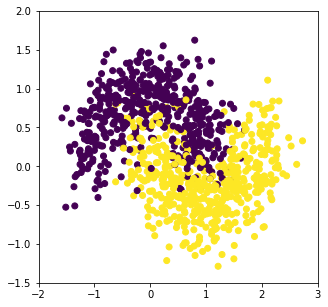

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
#Uyarı mesajlarını kapatmak için
import warnings
warnings.filterwarnings('ignore')

X, y = make_moons(n_samples= 1500, noise=0.3, random_state=0)
X,X_test, y, y_test = train_test_split(X,y, test_size = 0.333, random_state = 0)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c= y)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

Amacımız yukarıda sarı ve mor ile gösterilen sınıfları ayırmak olacak.

Keras'ta model oluşturmak için iki farklı yöntemi kullanabiliriz. Bunlardan ilki sıralı katmanlar (layer) halinde bir yapı oluşturmamızı sağlayan `Sequential` model yöntemi. `Sequential` fonksiyonu ile oluşturduğunuz yapay sinir ağı sadece birbirine sırayla bağlı olan katmanlardan oluşabilir. Diğer bir deyişle oluşturduğunuz ağ çevrimsiz yönlü bir çizgeye (directed acyclic graph) denk geliyor. Daha karmaşık yapılar için ise Functional API kullanmanız gerekiyor. Bu yapılarda bir katmana birden fazla katmandan girdi sağlanabilir. Aynı şekilde bir katmanın çıktısını birden fazla katman kullanabilir. Bu yazıda ilk olarak `Sequential` modellere değineceğiz. Daha sonra `Functional API` ile model kurmayı da göreceğiz.

İlk olarak gerekli yöntemleri yükleyelim. Yapay sinir ağı yoğun (dense) katmanlardan oluşacak. Yani bir katmandaki düğümler bir sonraki katmandaki bütün düğümlere bağlı olacak. Yoğun katmanlar, gözlemler ve özniteliklerden oluşan iki boyutlu yapılarda sıklıkla kullanılan bir mimari. Resim işleme, zaman serisi analizleri gibi alanlarda farklı mimariler de mevcut.

In [2]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


İlk olarak basit bir model oluşturalım.
* Modelin girdi katmanı veri kümesindeki iki boyutlu girdiyi kabul edecek. 
* Modeldeki ilk katmanda (gizli katman) iki düğüm olacak.
* Modelin ikinci katmanı ise çıktıların belirleneceği katman olacak. 

Derin öğrenme yöntemlerinin doğrusal olmayan ilişkileri modellemesi için her düğümde gerçekleşen işlemler doğrusal olmayan bir aktivasyon fonksiyonundan geçirilir. `Relu` (Rectified Linear Unit) aktivasyon fonksiyonu sıfırın altındaki değerlere sıfır, sıfırın üzerindeki değerlere ise kendi değerini atayan bir fonksiyondur. Aşağıdaki şekilde `Relu` fonksiyonunu görebilirsiniz.

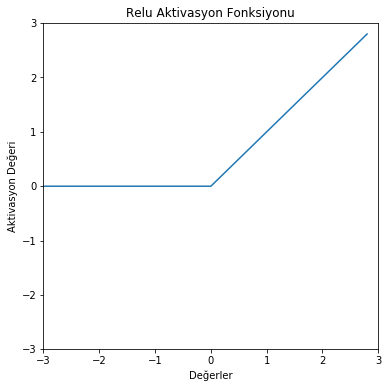

In [3]:
degerler = np.arange(-3, 3, .2)
sifir = np.zeros(len(degerler))
aktivasyon = np.max([sifir, degerler], axis=0)

fig = plt.figure(figsize = (6,6))
plt.plot(degerler, aktivasyon)
plt.ylim([-3.0, 3.0])
plt.xlim([-3.0, 3.0])
plt.ylabel('Aktivasyon Değeri')
plt.xlabel('Değerler')
plt.title('Relu Aktivasyon Fonksiyonu')

plt.show()

`Sigmoid` aktivasyon fonksiyonu ise $sgm(x) = \frac{1}{1+ e^{-x}}$ şeklinde tanımlanır ve yapay sinir ağında elde ettiğiniz değerleri 0 ile 1 arasında bir olasılığa çevirmek için kullanılır. Aşağıda sigmoid fonksiyonunu görebilirsiniz. [İlker'in dersinde](http://www.veridefteri.com/2018/12/22/tahmin-ve-cikarim-10-yapay-sinir-aglari/) başka aktivasyon fonksiyonu örnekleri de görebilirsiniz. 

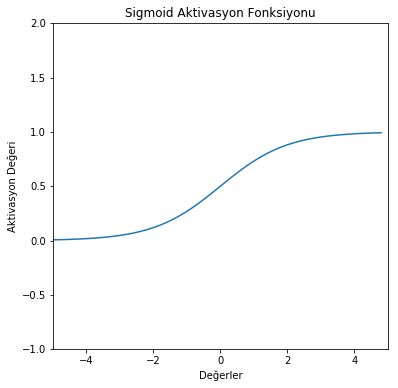

In [4]:
degerler = np.arange(-5, 5, .2)
sigmoid = 1 / (1+ np.exp(-degerler))

fig = plt.figure(figsize = (6,6))
plt.plot(degerler, sigmoid)
plt.ylim([-1.0, 2.0])
plt.xlim([-5.0, 5.0])
plt.ylabel('Aktivasyon Değeri')
plt.xlabel('Değerler')
plt.title('Sigmoid Aktivasyon Fonksiyonu')

plt.show()

Şimdi yukarıda bahsettiğimiz iki düğümlü bir katman ve çıktı katmanını içeren sinir ağını oluşturalım. Burada dikkat etmemiz gereken nokta ilk katmanda girdinin boyutunu belirtmek gerekliliği. Veri setimiz iki öznitelik içerdiği için bu değer iki olacak. Keras daha sonraki katmanlarda girdi ve çıktıları birbiriyle uyumlu olarak belirliyor. Kurduğumuz mimariyi aşağıdaki şekilde görebilirsiniz.

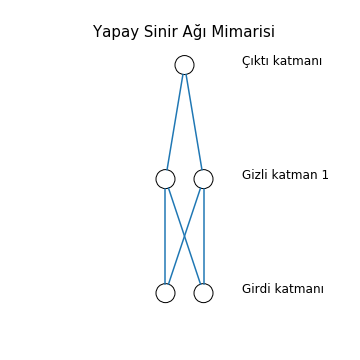

In [5]:
from IPython.display import Image
Image("Network1.png")

In [6]:
# Model oluşturuyoruz.
model = Sequential()
# Modele bir katman (gizli katman) ekliyoruz. Katmanda iki düğüm var ve relu aktivasyon fonksiyonunu kullanıyor. 
model.add(Dense(2, input_dim=2, activation='relu'))
# Aşağıda eklediğimiz katman çıktı katmanı. Bir sınıflandırma problemi üzerine çalıştığımız için
# sigmoid aktivasyon fonksiyonunu kullanıyoruz.
model.add(Dense(1, activation='sigmoid'))

Oluşturduğumuz modeli derlememiz gerekiyor. Bu noktada eniyilenecek amaç fonksiyonu, eniyileme yöntemi ve takip edilecek başarı ölçütlerini belirtiyoruz. İkili sınıflandırma problemlerinde `binary_crossentropy` sıklıkla kullanılan bir amaç fonksiyonu. Eniyileme yöntemi olarak `Adam` ve takip edilecek ölçüt olarak isabetlilik değerini kullanalım. Birden fazla ölçütü takip etmeniz mümkün olsa da amaç fonksiyonunuz tek bir fonksiyon olmalı.

Eniyileme yöntemi olarak seçtiğim `Adam` oldukça popüler bir yöntem. Yöntem hakkında bilgi edinmek isteyenler için [linkteki](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) yazıyı ve yöntemin tanıtıldığı [makaleyi](https://arxiv.org/abs/1412.6980) önerebilirim.

In [7]:
# Modeli derlerken amaç fonksiyonu (loss), eniyileme yöntemini (adam) ve takip edeceğimiz
# başarı ölçütlerini (accuracy) sağlıyoruz.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Sırada modeli eğitmek var. Burada da karşımıza iki kavram çıkıyor: epochs ve batch_size. Küme büyüklüğü (batch_size) bir seferde yapay sinir ağını eğitmek için kullanılacak örnek sayısını belirtir. Bütün veri kümesinin yapay sinir ağından bir kere geçmesi ise bir devir (epoch) olarak adlandırılır. Elimizdeki 1000 örneklemlik bir veri kümesi için küme büyüklüğü 10 ise bir devirde yapay sinir ağı 100 kere güncellenir. Şimdi küme büyüklüğü 10 ve devir sayısı 15 olacak şekilde modeli eğitelim.

In [8]:
# Batch_size her adımda kaç örneklemin model parametrelerini değiştirmek için kullanılacağını belirtir.
# Epoch ise bütün örneklerin modelden kaç kere geçeceğini söyler.
# Bu durumda her bir epoch 1000/10 = 100 adımdan oluşur. Bu adımların her birinde 10 tane örneklem kullanılarak 
# yapay sinir ağının parametreleri güncellenir.
model.fit(X, y, epochs=15, batch_size=10)

Epoch 1/15
1000/1000 [==============================] - 0s 276us/step - loss: 0.6519 - acc: 0.5150
Epoch 2/15
1000/1000 [==============================] - 0s 80us/step - loss: 0.6205 - acc: 0.6060
Epoch 3/15
1000/1000 [==============================] - 0s 96us/step - loss: 0.5984 - acc: 0.6780
Epoch 4/15
1000/1000 [==============================] - 0s 110us/step - loss: 0.5802 - acc: 0.7200
Epoch 5/15
1000/1000 [==============================] - 0s 87us/step - loss: 0.5652 - acc: 0.7470
Epoch 6/15
1000/1000 [==============================] - 0s 100us/step - loss: 0.5524 - acc: 0.7540
Epoch 7/15
1000/1000 [==============================] - 0s 100us/step - loss: 0.5405 - acc: 0.7600
Epoch 8/15
1000/1000 [==============================] - 0s 84us/step - loss: 0.5298 - acc: 0.7630
Epoch 9/15
1000/1000 [==============================] - 0s 123us/step - loss: 0.5200 - acc: 0.7700
Epoch 10/15
1000/1000 [==============================] - 0s 120us/step - loss: 0.5104 - acc: 0.7760
Epoch 11/15
1

Şimdi karar sınırlarına bakalım. Bu amaçla belirttiğimiz aralıkta noktalar oluşturup, oluşturduğumuz noktaların sınıflandırmasını gerçekleştireceğiz. `predict_classes` fonksiyonu her gözlemin hangi sınıfa ait olduğunu bulmamızı sağlar. `predict` fonksiyonu ise gözlemlerin sınıflara ait olma olasılığını gösterir.

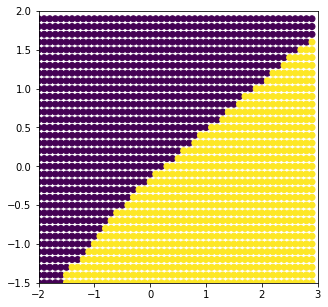

In [9]:
xx, yy = np.meshgrid(np.arange(-2, 3, 0.1),
                     np.arange(-1.5, 2, 0.1))

yhat = model.predict_classes(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(5,5))
plt.scatter(xx,yy, c= yhat)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

Gördüğünüz gibi model doğrusal olmayan ilişkiyi bulmak için biraz basit kaldı. Şimdi önümüzde iki seçenek var: devir sayısını arttırmak, mimariyi değiştirmek. Modelin çıktısına bakarsak performansın çok düşük olmadığını görüyoruz. Ancak örüntü basite indirgenmiş. O zaman, katmandaki düğüm sayısını arttırarak tekrar deneyelim. Katmandaki düğüm sayısı, modelinizin esnekliğini artırmanızı sağladığı için daha iyi bir çözüm olabilir. Gizli katmandaki düğüm sayısını yirmiye çıkaralım. Aşağıdaki şekilde ikinci yapay sinir ağının mimarisini bulabilirsiniz.

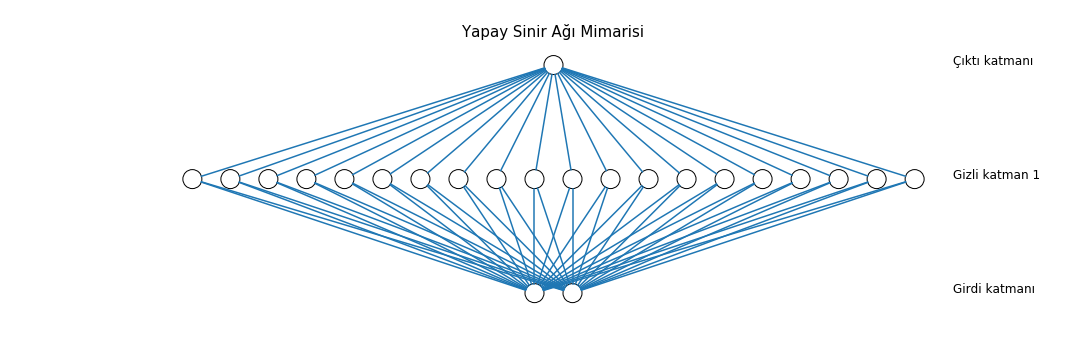

In [10]:
Image("Network2.png")

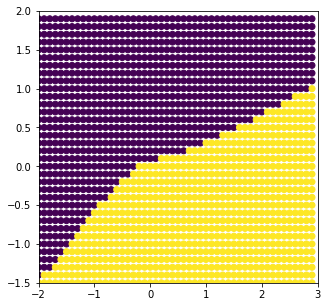

In [11]:
# Modeli 20 düğümlü bir katmanla oluşturalım. Geri kalan adımlar değişmeyecek.
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Modelin çıktılarını kapatmak için verbose = 0 değerini kullanmak gerekiyor.
model.fit(X, y, epochs=15, batch_size=10, verbose = 0)

xx, yy = np.meshgrid(np.arange(-2, 3, 0.1),
                     np.arange(-1.5, 2, 0.1))

yhat = model.predict_classes(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(5,5))
plt.scatter(xx,yy, c= yhat)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

Model doğrusal olmayan ilişkiyi öğrenmeye başlamış. Ancak çok isabetli bir örüntü çıkarmamış. Devir sayısını arttırarak tekrar deneyelim.

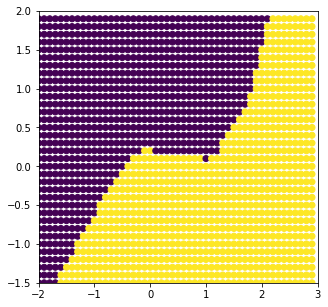

In [12]:
# Bir önceki modeli kullanıyoruz
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Devir sayısını 50 yapalım.
model.fit(X, y, epochs=50, batch_size=10, verbose = 0)

xx, yy = np.meshgrid(np.arange(-2, 3, 0.1),
                     np.arange(-1.5, 2, 0.1))

yhat = model.predict_classes(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(5,5))
plt.scatter(xx,yy, c= yhat)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

Karar sınırlarında bir iyileşme görüyoruz. 

## "Functional API"

Keras ile model oluşturmanın bir diğer yolu da `Functional API`. Bu sayede oluşturduğunuz katmanları birbirine ardışık olarak bağlamak zorunluluğu da ortadan kalkmış oluyor. Bir katmanın çıktısını birden fazla katman kullanabilir ya da bir katmana birden fazla katman girdi sağlayabilir. Şimdi yukarıda oluşturduğumuz modele iki katman daha ekleyerek bir örnek yapalım. `Functional API`ı kullanmak için her katmanı bir değişken gibi tanımlamamız gerekiyor. Her katman girdi olarak bir başka katmanı alıyor. Bu mantıkta girdileri de bir `Input` katmanıyla tanımlamamız şart.

Farklı bir katman tipi öğrenmek açısından `Dropout` katmanını da kullanalım. `Dropout` katmanı her adımda belirtilen orandaki girdiyi rassal olarak sıfıra eşitleyerek modelin veriye aşırı uyum sağlamasının ([aşırı öğrenmenin](http://www.veridefteri.com/2017/11/07/asiri-ogrenme-ve-eksik-ogrenme/)) önüne geçer. Buna karşılık `Dropout` katmanı modelin eğitilmesinin uzamasına neden olabilir, yani devir sayısını arttırmanız gerekebilir.

Aşağıdaki şekilde üçüncü yapay sinir ağının mimarisini bulabilirsiniz. `Dropout` katmanı 1 numaralı gizli katmandaki kimi çıktıları baskıladığı için ayrıca şekle eklemedim.

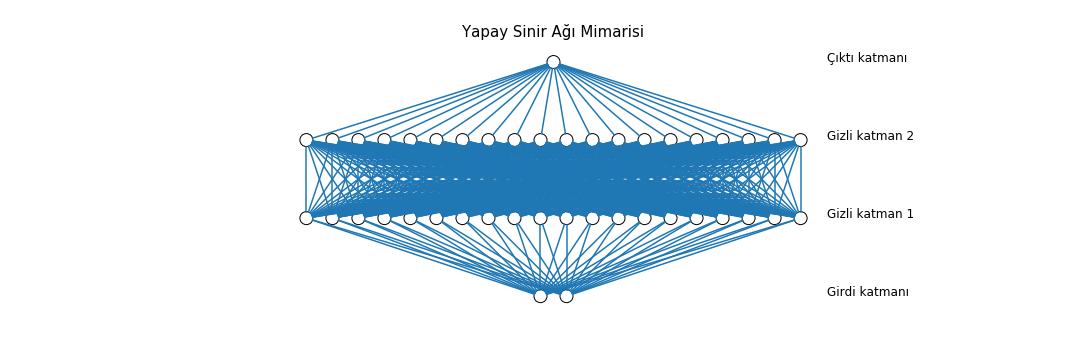

In [13]:
Image("Network3.png")

In [14]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model

# Girdi katmanını tanımlıyoruz. Girdideki öznitelik sayısını da belirtiyoruz.
# Bizim örneğimizde iki öznitelik var.
inputs = Input(shape=(2,))

# İki tane katman tanımlayacağız. Bunlardan ilki inputs katmanını girdi olarak alıyor ve 20 düğümden oluşuyor.
layer1 = Dense(20, activation='relu')(inputs)
# Dropout katmanı layer1 katmanını girdi olarak kabul ediyor.
layer_dropout = Dropout(rate = 0.1)(layer1)
# İkinci katman ise layer_dropout adlı katmanı girdi olarak alacak ve yine 20 düğümden oluşacak.
layer2 = Dense(20, activation='relu')(layer_dropout)
# Tahmin yaptığımız katman layer2 adlı katmanı girdi olarak alıyor.
# Aktivasyon fonksiyonu ise daha önce de gördüğümüz gibi sigmoid olacak. Bu katman tek bir düğümden oluşuyor.
predictions = Dense(1, activation='sigmoid')(layer2)

# Model oluştururken girdi ve çıktı katmanlarını sağlamamız yeterli.
model = Model(inputs=inputs, outputs=predictions)
# Modeli derlemek ve eğitmek için aynı parametreleri kullanıyoruz.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, batch_size=10, epochs=50, verbose = 0)  # starts training

Bir önceki örnekte olduğu gibi karar sınırlarını çizdirebiliriz. Ancak `Functional API` `predict_classes` fonksiyonunu desteklemiyor. `predict` fonksiyonuyla bulduğumuz olasılıkları sınıflara çevirerek bu sorunu aşabiliriz.

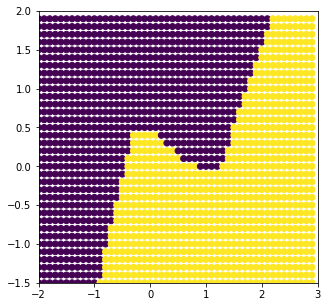

In [15]:
xx, yy = np.meshgrid(np.arange(-2, 3, 0.1),
                     np.arange(-1.5, 2, 0.1))

yhat = ( model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  > 0.5) *1

plt.figure(figsize=(5,5))
plt.scatter(xx,yy, c= yhat)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

Gördüğünüz gibi Keras sayesinde yapay sinir ağları oluşturmak oldukça kolay. Ancak şunu da unutmamak gerekir ki, derin öğrenmenin sanata döndüğü yer mimarinin oluşturulması. Biz henüz bu konuya değinmedik. Buna da planladığım derste değinmeyi amaçlıyorum.

Bu yazıda kullandığım yapay sinir ağı mimarisi şekillerini [linkteki](https://stackoverflow.com/questions/29888233/how-to-visualize-a-neural-network) kodu kullanarak çizdim.

Bu yazıya [Github](https://github.com/sibirbil/VeriDefteri) dizinimizden ulaşabilirsiniz.